In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from statsmodels.tsa.statespace.sarimax import SARIMAX

In [3]:
np.random.seed(0)
n = 100
data = np.random.normal(0, 1, n)
dates = pd.date_range(start = '2022-01-01', periods=n, freq='M')

In [4]:
df = pd.DataFrame({'Value': data}, index=dates)

In [5]:
print(df)

               Value
2022-01-31  1.764052
2022-02-28  0.400157
2022-03-31  0.978738
2022-04-30  2.240893
2022-05-31  1.867558
...              ...
2029-12-31  0.706573
2030-01-31  0.010500
2030-02-28  1.785870
2030-03-31  0.126912
2030-04-30  0.401989

[100 rows x 1 columns]


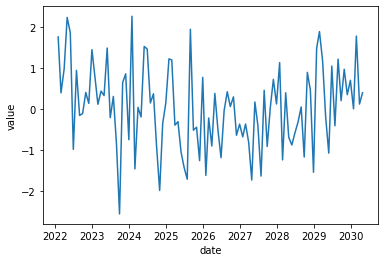

In [6]:
plt.plot(df)
plt.xlabel('date')
plt.ylabel('value')
plt.show()

In [7]:
model = SARIMAX(df, order = (1, 1, 1), seasonal_order = (1, 1, 1, 12))
results = model.fit()

In [10]:
print(results.summary())

                                     SARIMAX Results                                      
Dep. Variable:                              Value   No. Observations:                  100
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -134.870
Date:                            Thu, 01 Jun 2023   AIC                            279.739
Time:                                    10:48:03   BIC                            292.069
Sample:                                01-31-2022   HQIC                           284.704
                                     - 04-30-2030                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0495      0.132     -0.376      0.707      -0.308       0.209
ma.L1         -0.8976      0.074   

In [12]:
pred = results.predict(start='2022-01-31', end='2030-04-30')

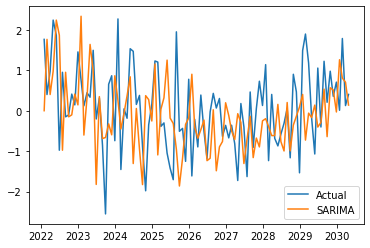

In [16]:
plt.plot(df, label='Actual')
plt.plot(pred, label='SARIMA')
plt.legend()
plt.show()